In [12]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier

In [3]:
# importing dataset

fraud=pd.read_csv("/content/Fraud_check.csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
#Checking info

fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
# Adding the column tax to seperate the <= 30000 as "Risky" and others are "Good"

fraud["Tax"]=["Risky"if i<= 30000 else "Good" for i in fraud["Taxable.Income"]]
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [6]:
# Performing label encoding to convert categorical data to numeric

le=LabelEncoder()

fraud["Undergrad"]=le.fit_transform(fraud["Undergrad"])
fraud["Marital.Status"]=le.fit_transform(fraud["Marital.Status"])
fraud["Urban"]=le.fit_transform(fraud["Urban"])
fraud["Tax"]=le.fit_transform(fraud["Tax"])

**Assuming Tax, Risky=0 and others are Good=1**

In [7]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


# **Visulazation**

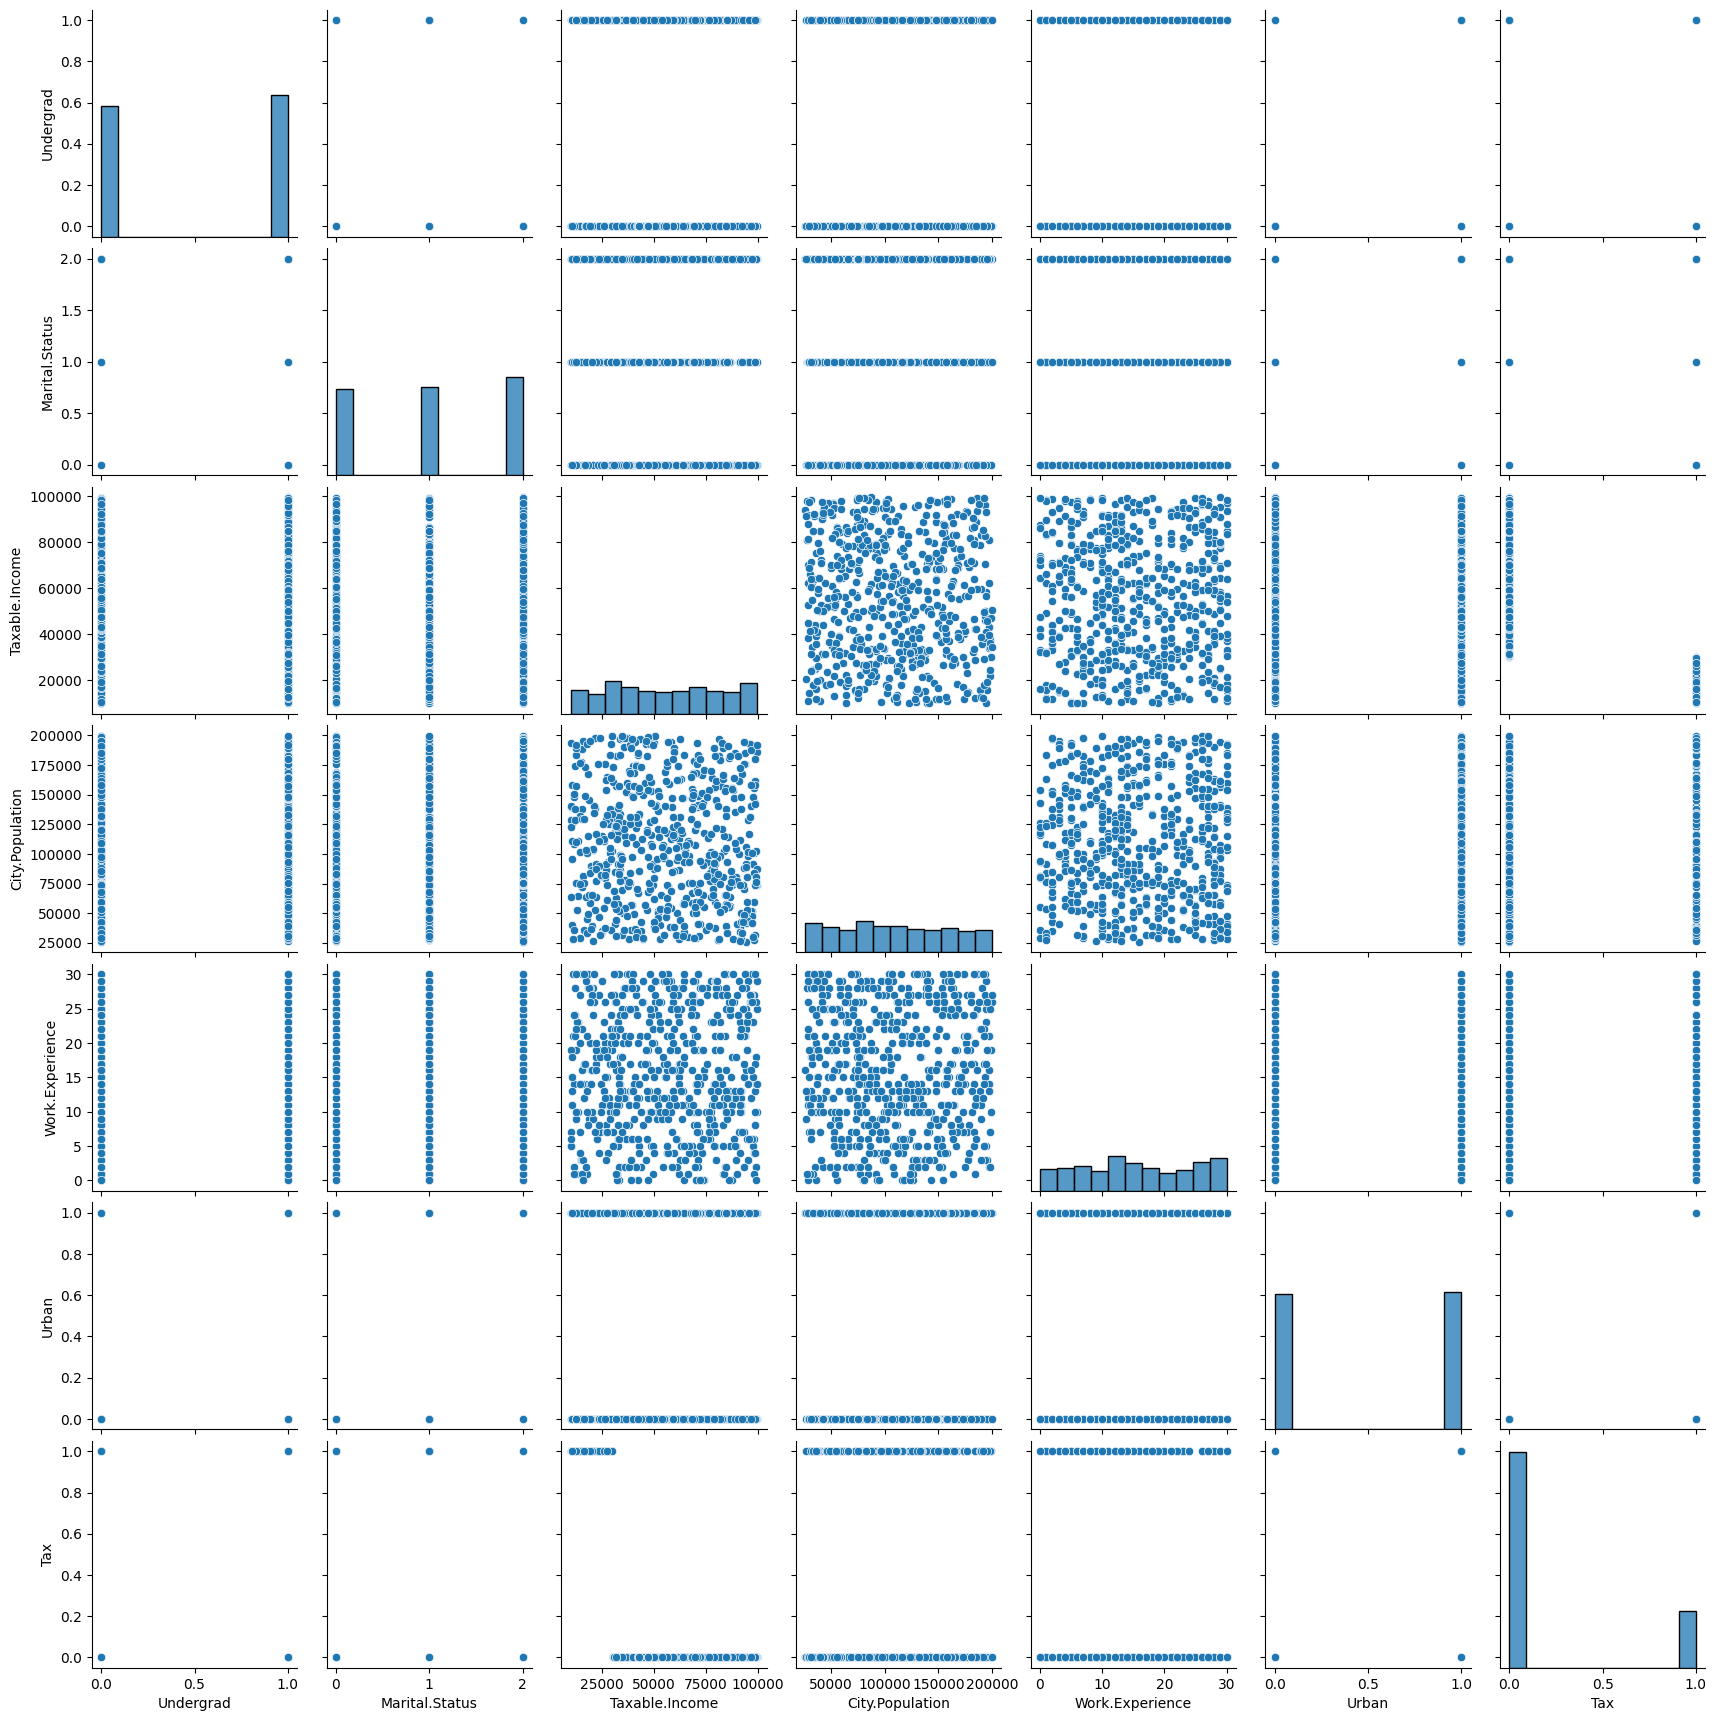

In [13]:
# Plotting a pairplot

sns.pairplot(fraud)

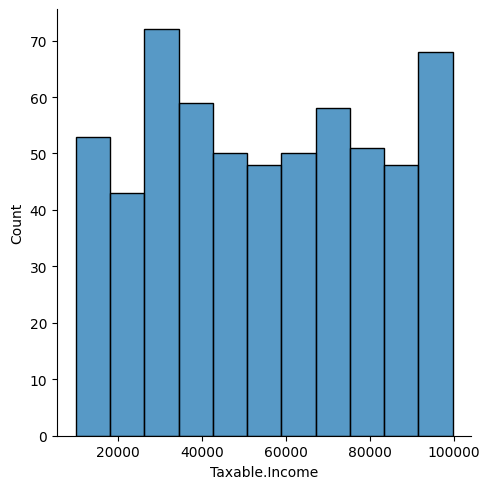

In [15]:
# Distribution plot

sns.displot(fraud["Taxable.Income"])

<Axes: xlabel='Taxable.Income', ylabel='Work.Experience'>

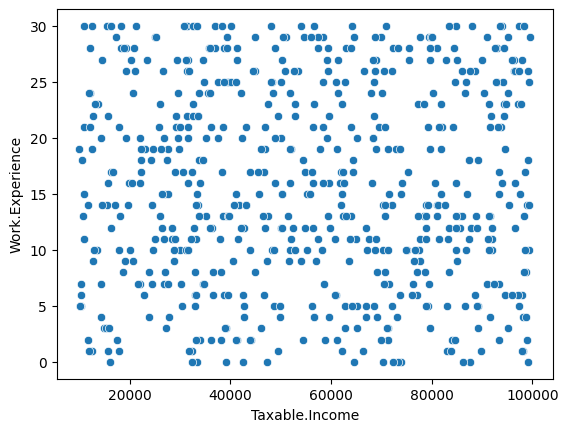

In [18]:
# Plotting scatter plot.

sns.scatterplot(x="Taxable.Income",y="Work.Experience",data=fraud)

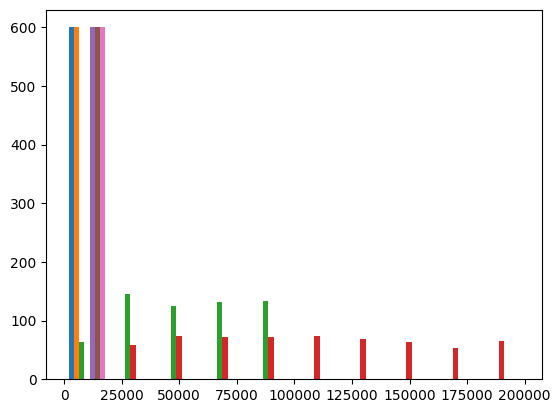

In [20]:
# Plotting histogram

plt.hist(fraud)
plt.show()

<Axes: xlabel='Taxable.Income', ylabel='Work.Experience'>

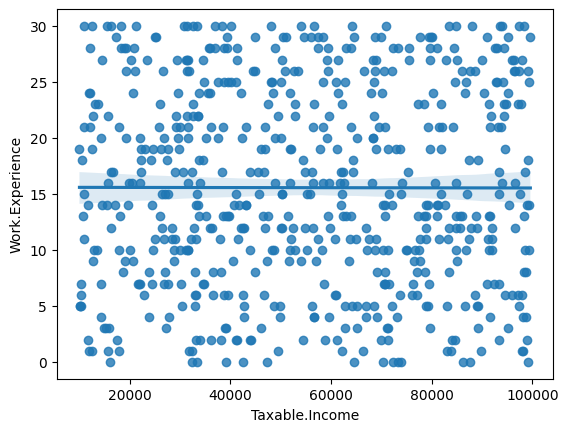

In [21]:
# Regression plot

sns.regplot(x="Taxable.Income",y="Work.Experience",data=fraud)

In [16]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [8]:
# Splitting data in to x and y variables

x=fraud.iloc[:,0:6]
y=fraud.iloc[:,6]

In [9]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

# **Model Building by RandomForesClassifier**

In [10]:
model=RandomForestClassifier(n_estimators=100,max_features=3)

kfold=KFold(n_splits=10,random_state=0,shuffle=True)
result=cross_val_score(model,x,y,cv=kfold)

print(result.mean())

0.9983333333333334


# **Model Building by AdaBoostClassifier**

In [11]:
model1=AdaBoostClassifier(n_estimators=100,random_state=0)

result1=cross_val_score(model1,x,y,cv=kfold)
result.mean()

0.9983333333333334